In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import pandas as pd
import matplotlib as mp
from matplotlib import gridspec
from matplotlib.patches import Rectangle
mp.style.use('classic')

# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
dummy, time, vboost, vclamp9, v1p0, v2p5a = datafileread('total_fullblock_m100v.csv',19)
dummy, dummy, dummy, time_mes, v2p5a_mes = datafileread('curve4_m90V_Ch3.csv',6)

print("Loaded files")

undersample = 100
time_mes = time_mes[::undersample]
v2p5a_mes =  v2p5a_mes[::undersample]

time *= 1e6
time_mes = time_mes * 1e6 + 54

Loaded files


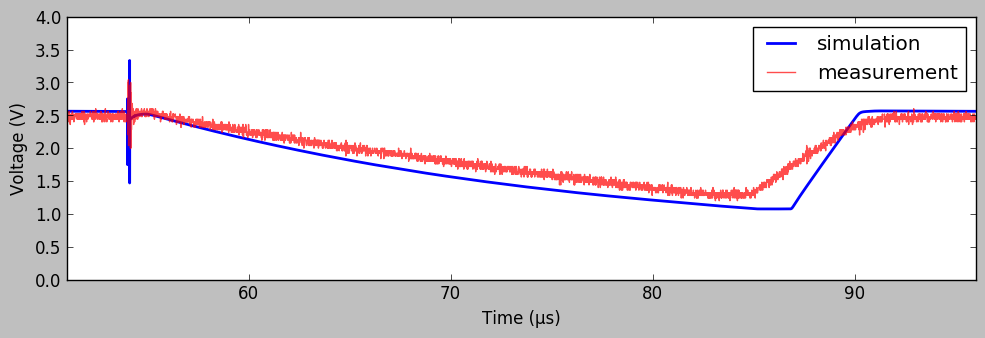

In [4]:
plt.figure(figsize=(10, 3.5)) 

plt.plot(time, v2p5a, linewidth=2, label="simulation")
plt.plot(time_mes, v2p5a_mes,'-r', alpha=0.7, label="measurement")
plt.xlim([51, 96])
plt.ylim([0, 4])
#plt.title("voltage (V)")
plt.xlabel("Time (μs)")
plt.ylabel("Voltage (V)")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("../../src/3/figures/v2p5.png", pad_inches=0.3)
plt.show()

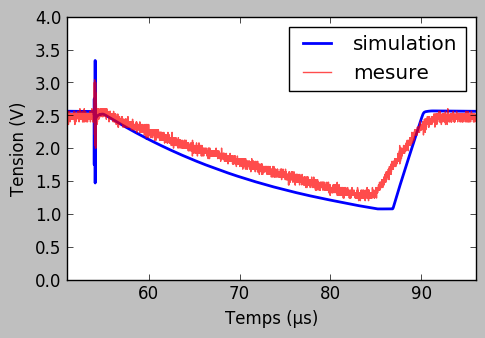

In [2]:
plt.figure(figsize=(5, 3.5)) 

plt.plot(time, v2p5a, linewidth=2, label="simulation")
plt.plot(time_mes, v2p5a_mes,'-r', alpha=0.7, label="mesure")
plt.xlim([51, 96])
plt.ylim([0, 4])
#plt.title("voltage (V)")
plt.xlabel("Temps (μs)")
plt.ylabel("Tension (V)")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("./v2p5_xs.png", pad_inches=0.3)
plt.show()

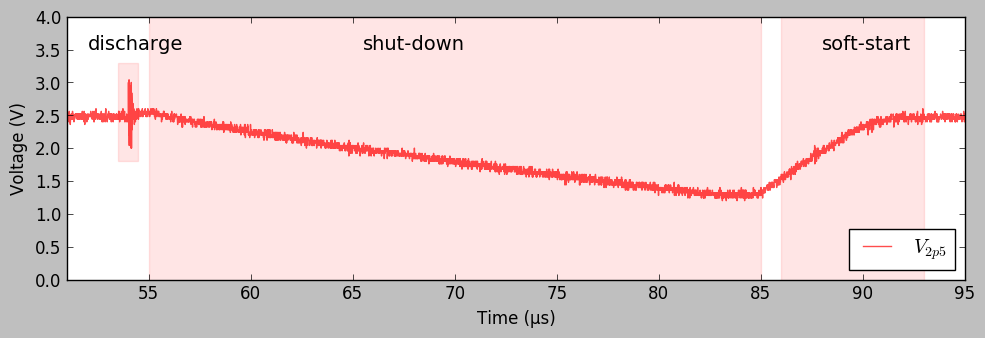

In [5]:
plt.figure(figsize=(10, 3.5)) 

#plt.plot(time, v2p5a, linewidth=2)
plt.plot(time_mes, v2p5a_mes, '-r', alpha=0.7, label="$V_{2p5}$")
plt.xlim([51, 95])
plt.ylim([0, 4])
#plt.title("V2p5(t)")
plt.xlabel("Time (μs)")
plt.ylabel("Voltage (V)")
plt.tight_layout()
plt.legend(loc="lower right")
plt.gca().add_patch(Rectangle((53.5, 1.8), 1, 1.5, color='red', alpha=0.1))
plt.gca().add_patch(Rectangle((55, -1.0), 30, 7, color='red', alpha=0.1))
plt.gca().add_patch(Rectangle((86, -1.0), 7, 7, color='red', alpha=0.1))
plt.annotate('discharge', xy=(52, 3.5), size=14)
plt.annotate('soft-start', xy=(88, 3.5), size=14)
plt.annotate('shut-down', xy=(65.5, 3.5), size=14)
plt.savefig("../../src/3/figures/v2p5_measure.png", pad_inches=0.3)
plt.show()